In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [68]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'one_repair_lvl_many_models'
DB_COLLECTION_NAME = f'exp_{EXPERIMENT_NAME}'
DATASET_NAME = 'Folktables_NY_2018_Employment'
EXPERIMENT_SESSION_UUID = 'e12769fb-57b5-4b99-b5e8-35e8b2f952d1'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['LogisticRegression', 'RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(288, 35)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,...,0.757558,1.000000,0.000000,0.735146,1.000000,0.000000,0.757696,1.000000,0.000000,0.746500
1,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:13:56.437,...,0.757558,1.000000,0.000000,0.738167,1.000000,0.000000,0.755710,1.000000,0.000000,0.747000
2,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,1,OK,2023-07-13 20:09:51.318,...,0.741087,1.000000,0.000000,0.748603,1.000000,0.000000,0.730022,1.000000,0.000000,0.740000
3,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,1,OK,2023-07-13 20:13:56.447,...,0.736996,1.000000,0.000000,0.744879,1.000000,0.000000,0.726782,1.000000,0.000000,0.736500
4,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,2,OK,2023-07-13 20:09:51.332,...,0.743425,1.000000,0.000000,0.765363,1.000000,0.000000,0.725702,1.000000,0.000000,0.747000
5,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,2,OK,2023-07-13 20:13:56.459,...,0.741672,1.000000,0.000000,0.763501,1.000000,0.000000,0.722462,1.000000,0.000000,0.744500
6,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:09:51.343,...,0.746932,1.000000,0.000000,0.736499,1.000000,0.000000,0.750540,1.000000,0.000000,0.743000
7,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:13:56.471,...,0.745763,1.000000,0.000000,0.737430,1.000000,0.000000,0.746220,1.000000,0.000000,0.741500
16,Accuracy,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:26:45.277,...,0.760141,1.000000,0.000000,0.702729,1.000000,0.000000,0.791581,1.000000,0.000000,0.746000
17,Accuracy,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:31:01.840,...,0.760729,1.000000,0.000000,0.701754,1.000000,0.000000,0.792608,1.000000,0.000000,0.746000


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [13]:
exp_subgroup_metrics_dct[MODEL_NAMES[0]]['Exp_iter_1'][0.5].keys()

dict_keys([0, 1, 2, 3])

In [14]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [19]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.0][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.040989,-0.009741,-0.066254,RandomForestClassifier,Exp_iter_1,0.0,0
1,Equalized_Odds_FPR,0.018872,0.046176,0.080882,RandomForestClassifier,Exp_iter_1,0.0,0
2,Equalized_Odds_FNR,0.040989,0.009741,0.066254,RandomForestClassifier,Exp_iter_1,0.0,0
3,Disparate_Impact,0.991110,1.017852,0.997738,RandomForestClassifier,Exp_iter_1,0.0,0
4,Statistical_Parity_Difference,-0.009449,0.018799,-0.002395,RandomForestClassifier,Exp_iter_1,0.0,0


In [20]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.5][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.034023,-0.005409,-0.044470,RandomForestClassifier,Exp_iter_1,0.5,0
1,Equalized_Odds_FPR,0.009326,0.069253,0.085112,RandomForestClassifier,Exp_iter_1,0.5,0
2,Equalized_Odds_FNR,0.034023,0.005409,0.044470,RandomForestClassifier,Exp_iter_1,0.5,0
3,Disparate_Impact,0.991292,1.038035,1.021353,RandomForestClassifier,Exp_iter_1,0.5,0
4,Statistical_Parity_Difference,-0.009286,0.039962,0.022605,RandomForestClassifier,Exp_iter_1,0.5,0


## Create subgroup boxplots

In [22]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [23]:
melted_all_subgroup_metrics_per_model_dct[MODEL_NAMES[0]]

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,Model_Init_Seed,Fair_Intervention_Params_Lst,Intervention_Param,Subgroup,Metric_Value
0,Accuracy,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_1,100,100,"[0.0, 0.5]",0.0,RAC1P_dis,0.714286
1,Aleatoric_Uncertainty,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_1,100,100,"[0.0, 0.5]",0.0,RAC1P_dis,0.741802
2,F1,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_1,100,100,"[0.0, 0.5]",0.0,RAC1P_dis,0.766272
3,FNR,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_1,100,100,"[0.0, 0.5]",0.0,RAC1P_dis,0.190625
4,FPR,100,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,0,OK,2023-07-13 20:09:51.290,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_1,100,100,"[0.0, 0.5]",0.0,RAC1P_dis,0.416309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Sample_Size,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:31:01.875,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_2,200,200,"[0.0, 0.5]",0.5,overall,2000.000000
338,Selection-Rate,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:31:01.875,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_2,200,200,"[0.0, 0.5]",0.5,overall,0.651000
339,Std,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:31:01.875,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_2,200,200,"[0.0, 0.5]",0.5,overall,0.026403
340,TNR,200,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Run_1,Folktables_NY_2018_Employment,50,3,OK,2023-07-13 20:31:01.875,e12769fb-57b5-4b99-b5e8-35e8b2f952d1,Exp_iter_2,200,200,"[0.0, 0.5]",0.5,overall,0.607488


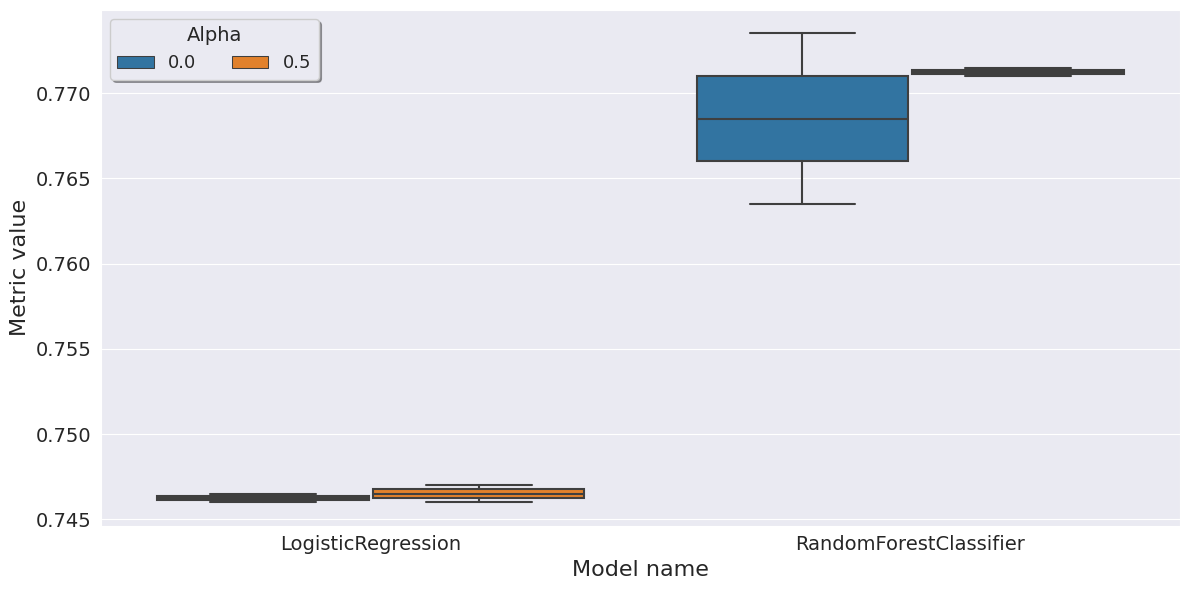

In [71]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy')

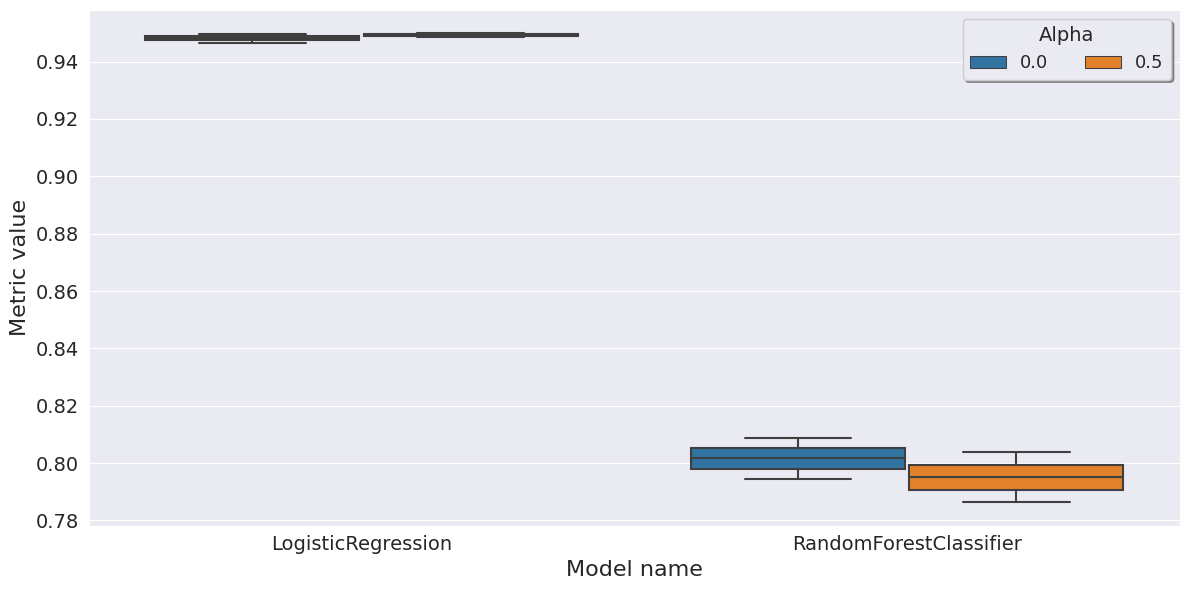

In [72]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                           legend_location='upper right')

## Create group boxplots

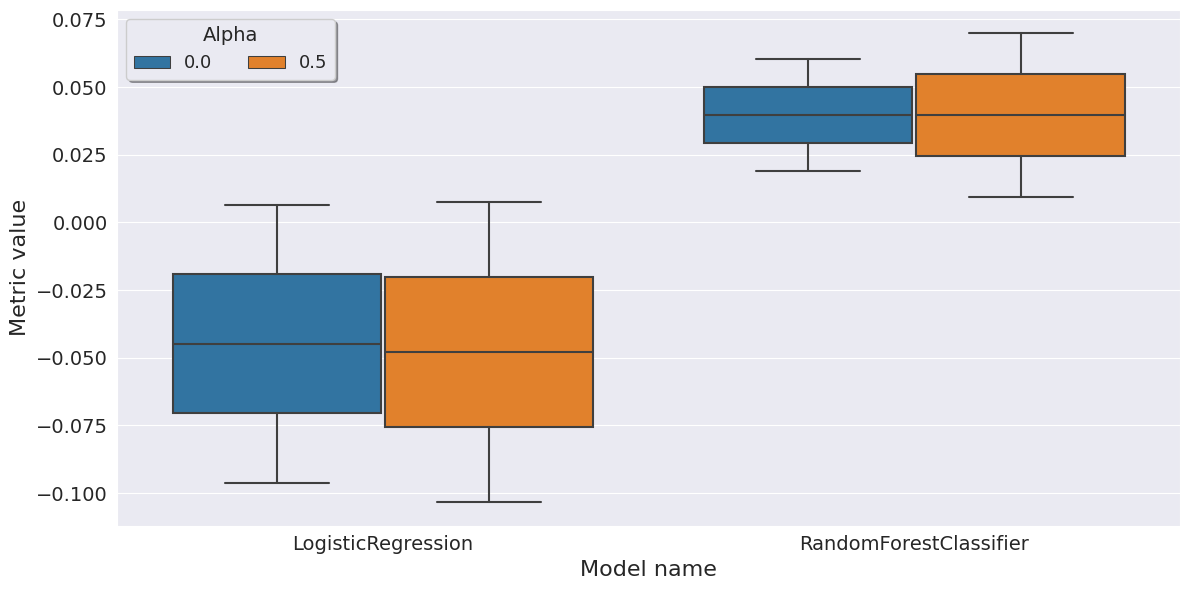

In [73]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='SEX')

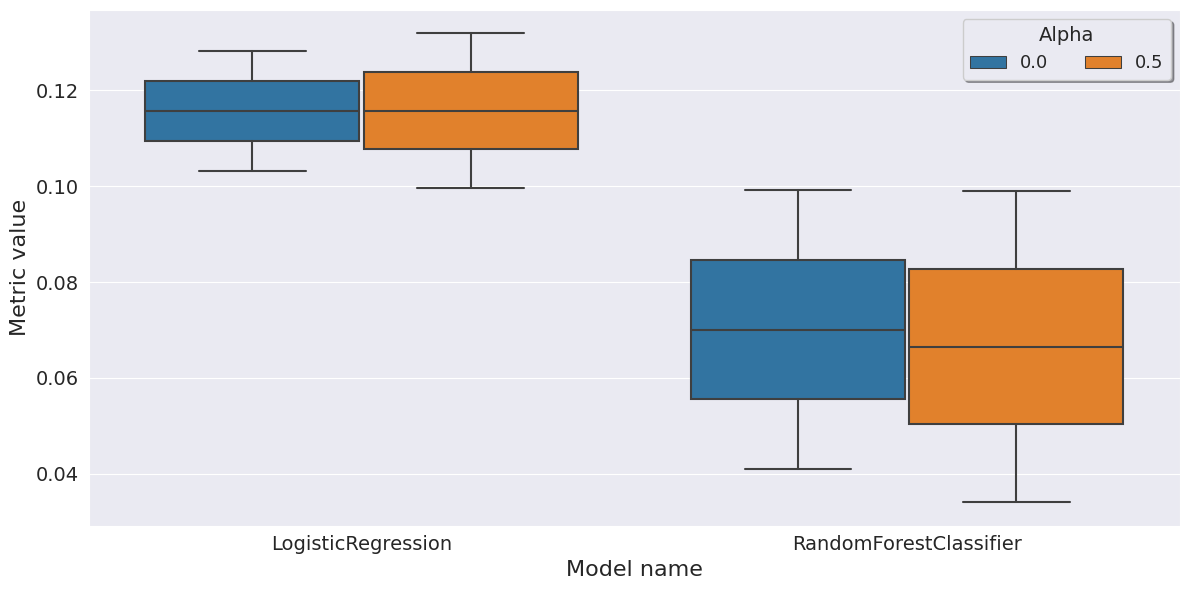

In [74]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                           legend_location='upper right')

## Create out-of-domain boxplots

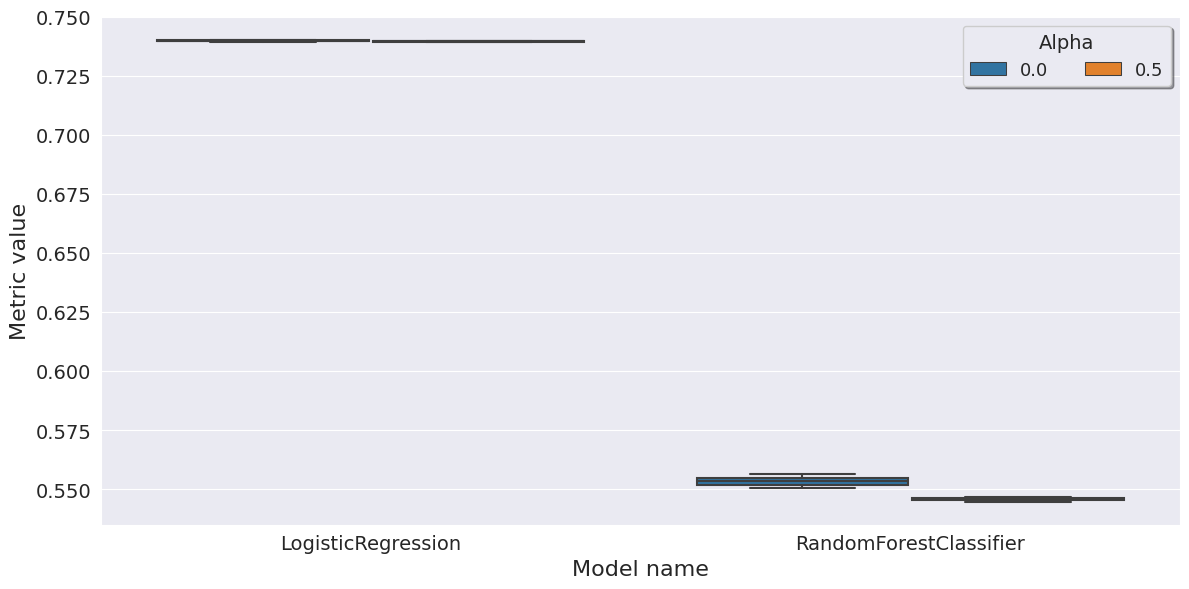

In [80]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_name='Aleatoric_Uncertainty',
                                           legend_location='upper right', test_set_index=1)

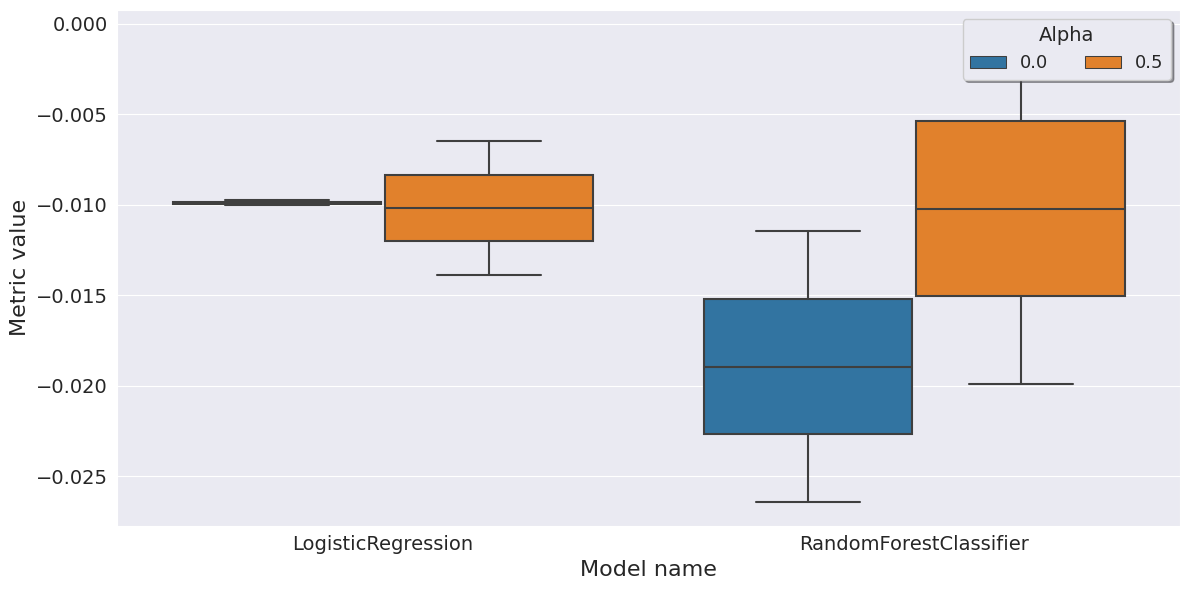

In [67]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                           legend_location='upper right', test_set_index=1)